In [13]:
# import jupyter notebook magic to show plots and automatically load modules
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
# import python packages for solving the problem
import pandas as pd
import math
import numpy as np
from datetime import datetime
import os
import sys
import seaborn as sns
import matplotlib.pyplot as plt

#import customized modules
src_dir = os.path.abspath(os.path.join(os.pardir, 'src'))
sys.path[0] = src_dir
from modules import *

In [ ]:
# file names of the data
cta_entry_fname = '../data/CTA_-_Ridership_-__L__Station_Entries_-_Daily_Totals.csv'
cta_station_fname = '../data/CTA_-_System_Information_-_List_of__L__Stops.csv'

In [ ]:
# read data into data frames
df_cta_entry = pd.read_csv(cta_entry_fname)
# convert the date in string to datetime
df_cta_entry['date'] = df_cta_entry.date.apply(lambda x: str_to_date(x))
df_cta_station = pd.read_csv(cta_station_fname)

# Warm Up Questions

- Which stop has the highest average ridership per day, and what is it?

- What’s the standard deviation for the Washington/Wabash stop? What’s your hypothesis for why?

## Highest average ridership

Station with the highest average ridership per day is Clark/Lake, with mean of 13972.55(~13973)  people per day

In [ ]:
# group each ride by each station, and calculate the mean
df_rides = pd.DataFrame(df_cta_entry.groupby(['stationname']).rides.mean())
# sort the station in order of highest mean to lowest mean per day
df_rides = df_rides.sort_values('rides', ascending=False)
# station withe the highest mean is the first station
highest_mean = df_rides.iloc[0]

In [ ]:
print('Train station with the highest aveage ridership per day is : {}'.format(highest_mean.name))

### Plot for the average ridership for each station in descending order

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))
df_rides = df_rides.reset_index()
sns.barplot(x='stationname', y='rides', data=df_rides, ax=ax)
for item in ax.get_xticklabels():
    item.set_rotation(90)
#figure style
fontsize=16
ax.set_xlabel('Stop', fontsize=fontsize)
ax.set_xticklabels(df_rides.stationname, fontsize=0.5*fontsize)
ax.set_ylabel('Number of rides', fontsize=fontsize)

fig.savefig('../result/average_ridership.png', transparent=True)

##  What’s the standard deviation for the Washington/Wabash stop? What’s your hypothesis for why?

In the data set, Washington/Wabash which is the staion hosting 5 lines (Green, Brown, Purple Express, Pink and Orange) has less than 100 customers per day until 8/30/2017, then surges up to thousands on 8/31/2017. From this observation, we can infer that Washington/Wabash was either under construction or closed. 

By cross checking with CTA (https://www.transitchicago.com/washingtonwabash/) Washington/Wabash opened on August 31, 2017. From this information, we can conclude that ~100 customers per day until 8/30/2017 is probably operators or test users.

There are two other dates 2017-10-18 and 29 that have very low ridership (<100), which we can infer that the station was closed, however, since I could not find any other online data to confirm this, the two dates will be included in inferring the average ridership at Washington and Wabash. 

In [ ]:
map_id = df_cta_station[df_cta_station.STATION_NAME=='Washington/Wabash'].MAP_ID.unique()[0]

In [ ]:
df_ww = df_cta_entry[(df_cta_entry.station_id == map_id) & 
             (df_cta_entry.date >= pd.Timestamp('2017-08-31'))]

In [ ]:
ax = sns.scatterplot(x='date', y='rides',hue='daytype', style='daytype', data=df_ww)
axes = ax.axes
axes.set_xlim([pd.Timestamp('2017-8-20'), df_ww.date.iloc[-1]])
#figure style
fontsize=16
axes.set_xlabel('Date', fontsize=fontsize)
axes.set_ylabel('Number of rides', fontsize=fontsize)
axes.legend(bbox_to_anchor=(1.02, 1))
plt.savefig('../../ridership_washington_wabash.png', transparent=True)

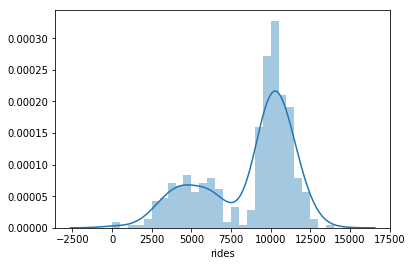

In [13]:
ax = sns.distplot(df_ww.rides, bins=np.arange(0, 15000, 500))

In [16]:
df_ww.rides.std()

2831.9266306337395